<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px">Привет! Меня зовут Миша, я буду проводить ревью на этом спринте. 
Мои комментарии и замечания далее по тексту помечены markdown различными цветами:
    
---    
<div class="alert alert-block alert-danger">
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
Когда всё сделано правильно.
</div>
    
---
    

Будет круто, если для своих ответов ты выберешь какой-то **<font color="brown">заметный цвет</font>**, так мне будет проще проверять в дальнейшем.

    
Удачи!
    
p.s.: не удаляй комментарии ревьюера, если предстоит что то доработать в проекте.</h7>

<div class="alert alert-block alert-warning">
<b>Комментарии от ревьюера v2:</b>

Уже гораздо лучше. Молодец! Но всё еще есть ошибки в рассчетах. Надеюсь теперь ты поймешь, почему я прошу о том, чтобы выводить результаты каждого шага - так можно найти ошибку. Например, в ситуации с data_orders_first. Если что то вдруг не понятно, то пиши. Буду жать!
</div>

<font color='blue'>
<b>Комментарий студента V2:</b>
    
Добавил новые изменения, но требуется еще помощь по некоторым пунктам, посмотри пожалуйста.
    
Благодарю за подробное исправление ошибок :)
</font>

<div class="alert alert-block alert-warning">
<b>Комментарии от ревьюера v3:</b>
    
Добавил новые замечания) Не волнуйся, во всех моментах постепенно разберемся
    

</div>

<font color='blue'>
<b>Комментарий студента V3:</b>
    
Исправил пункты до расчета LTV и сам LTV, просьба посмотреть дать обратную связь, и я буду дальше править, если на этих этапах все ок :)
</font>

<div class="alert alert-block alert-warning">
<b>Комментарии от ревьюера v4:</b>

ДОбавил тебе пояснений и ожидаю того же от тебя в дальнейшем) комментировать свои действия

</div>

<font color='blue'>
<b>Комментарий студента v5:</b>
    
Михаил, еще раз большое спасибо за подробные объяснения, с Вашей помощью получилось разобраться в нюансах расчетов метрик курса. И как всегда, получилось узнать что-то новое и полезное.
    
Дополнил немного расчеты ROMI заменив на правельные рассчеты САС и заменил обший вывод.
</font>

<div class="alert alert-block alert-success">
<b>Комментарии от ревьюера v6:</b>

Рад был помочь!) Главное, что во всем разобрались. ROI ты рассчитал верно! 
    
    
Я тебе скину еще дополнительный материал по заданной тематике:

https://drive.google.com/drive/folders/0B_ZoYnZ2uwMuNDhmaEZQSVdlU00 - Курс: аналитика от Алексея Куличевского

http://toolmark.ru/sokrovichica-analitika/ - сборник материалов по аналитике)
</div>

<div class="alert alert-block alert-danger">
<b>Комментарии от ревьюера:</b>

Итог ревью - ты проделал большую работу! Структура проекта немного спорная, но к его оформлению - вопросов нет. Показал умение строить графики и правильно их оформлять. Но есть замечания, которые тебе предстоит исправить, чтобы я мог принять этот проект. Оставил замечания по ходу проекта. Также не хватает анализа требуемых метрик в разрезе устройств - здесь тоже можно найти точки роста и различные инсайты. Надо обязательно добавить этот момент! Предлагаю рассмотреть в разрезе источников - LTV, СAC, ROI (некоторые ты и так рассматриваешь), а в разрезе устройств любые три, на твой взгляд ключевые метрики. Если возникнут какие либо вопросы, то пиши здесь в комментариях - обязательно отвечу. Буду ждать доработанный проект на повторное ревью. Удачи!
</div>

## Аналитика в Яндекс.Афише

### Описание проекта - основная задача

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Вам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

### План проекта

ШАГ 1.

-	загрузить данные
-	изучить данные в них, при возможности оптимизировать
-	проверить типы данных на корректность

ШАГ 2.

-	построить отчеты
-	построить метрики
-	отобразить их на графиках, и ответить на вопросы: как посчитанные метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

ШАГ 3.

-	написать вывод с рекомендациями для маркетологов, куда и сколько им стоит вкладывать денег


### Шаг 1. Открываем файлы с данными и изучаем их.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')

data_visits = pd.read_csv('/datasets/visits_log.csv')
data_orders = pd.read_csv('/datasets/orders_log.csv')
data_costs = pd.read_csv('/datasets/costs.csv')

print('Данные о визитах', data_visits.describe()) # изучение каждого датасета с помощью метода describe
print('')
print(data_visits.info()) # проверим типы данных и посмотрим наличие пропущенных значений
print('')
print('Данные о заказах', data_orders.describe()) 
print('')
print(data_orders.info()) 
print('')
print('Данные о затратах', data_costs.describe()) 
print('')
print(data_costs.info())
print('')
# проверяем дубликаты, для остальных датасетов проверяем аналогично 
print ('Дубликатов в данных о визитах:', data_visits.duplicated().sum()) 
print ('Дубликатов в данных о заказах:', data_orders.duplicated().sum()) 
print ('Дубликатов в данных о затратах:', data_costs.duplicated().sum())

# приводим названия всех столбцов к прописному типу
data_visits.columns = map(str.lower, data_visits.columns)
data_orders.columns = map(str.lower, data_orders.columns)

# производим замену типов данных
data_visits['end ts'] = pd.to_datetime(data_visits['end ts'])
data_visits['start ts'] = pd.to_datetime(data_visits['start ts'])
data_orders['buy ts'] = pd.to_datetime(data_orders['buy ts'])
data_costs['dt'] = pd.to_datetime(data_costs['dt'])

#переименуем некорректные названия столбцов
data_visits.rename(columns={'end ts': 'end_ts', 'start ts': 'start_ts', 'source id': 'source_id'}, inplace=True)
data_orders.rename(columns={'buy ts': 'buy_ts'}, inplace=True)
data_costs.rename(columns={'dt': 'cost_date'}, inplace=True)

Данные о визитах            Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Данные о заказах             Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  

### Вывод

-	Проверили на наличие пустых значений, таких не было обнаружено
-	Проверили данные на наличие дубликатов - дубликаты не обнаружены
-   В датасетах data_visits и data_orders нужно поменять названия столбцов на прописные
-	В датасете data_visits в столбцах Start Ts и End Ts нужно поменять тип с object на datetime
-	В датасете data_orders в столбце Buy Ts нужно поменять тип с object на datetime
-	В датасете data_costs в столбце dt нужно поменять тип с object на datetime
-   Выполнили замену типов данных и названия столбцов


### Шаг 2. Построим отчёты и посчитаем метрики

Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

In [2]:
first_activity_date = data_visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
data_visits = data_visits.join(first_activity_date,on='uid', how='left')

data_visits['session_year']  = data_visits['start_ts'].dt.year
data_visits['session_month'] = data_visits['start_ts'].dt.month
data_visits['session_week']  = data_visits['start_ts'].dt.week
data_visits['session_date'] = data_visits['start_ts'].dt.date

dau_total = data_visits.groupby(['session_year', 'session_date']).agg({'uid': 'nunique'})
wau_total = data_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
mau_total = data_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})

print('В день сервисом пользуется -',int(dau_total.mean().round()),'пользователей')
print('В неделю сервисом пользуется -',int(wau_total.mean().round()),'пользователей')
print('В месяц сервисом пользуется -',int(mau_total.mean().round()),'пользователей')
print('')

В день сервисом пользуется - 908 пользователей
В неделю сервисом пользуется - 5716 пользователей
В месяц сервисом пользуется - 23228 пользователей



Text(0.5, 1.0, 'MAU')

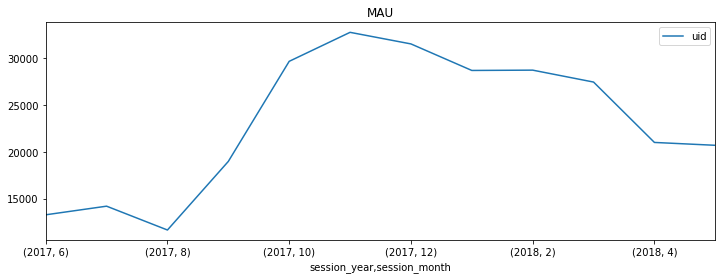

In [3]:
mau_total_plot = data_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_total_plot.plot(figsize=(12,4))
plt.title('MAU')

In [4]:
session_per_day = data_visits.groupby('session_date').agg({'uid':'count'}).reset_index()
session_per_day.columns = ['session_date', 'cnt_sessions']
print('Количество сессий в день -', int(session_per_day['cnt_sessions'].median().round())) # для рассчета количества сессий в день правильно будет рассчитать медиану

users_per_day = data_visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
users_per_day.columns = ['session_date', 'cnt_users']
session_users_day = session_per_day.merge(users_per_day,on='session_date')
session_users_day['session_per_user'] = session_users_day['cnt_sessions']/session_users_day['cnt_users']
print('Количество сессий в день на одного пользователя в среднем равно -', round(session_users_day['session_per_user'].mean(), 2))

data_visits['duration'] = (data_visits['end_ts'] - data_visits['start_ts']).dt.seconds
data_visits_duration = data_visits.query('duration > 0') # исключим сессии с продолжительностью 0 секунд
print('Продолжительность одной сессии равна -',st.mode(data_visits_duration['duration']),'секунд')

Количество сессий в день - 1003
Количество сессий в день на одного пользователя в среднем равно - 1.08
Продолжительность одной сессии равна - ModeResult(mode=array([60]), count=array([53029])) секунд


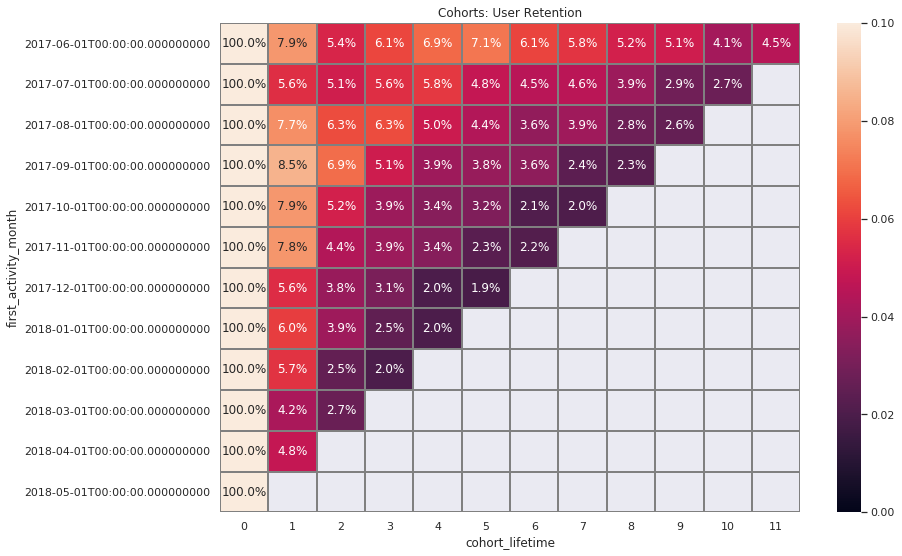

In [5]:
data_visits['first_activity_month'] = data_visits['first_activity_date'].astype('datetime64[M]')
data_visits['activity_month'] = data_visits['start_ts'].astype('datetime64[M]')
data_visits['cohort_lifetime'] = data_visits['activity_month'] - data_visits['first_activity_month']
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'] / np.timedelta64(1,'M')
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'].round().astype('int')

cohorts = data_visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=.10)

Text(0.5, 1.0, 'session MAU')

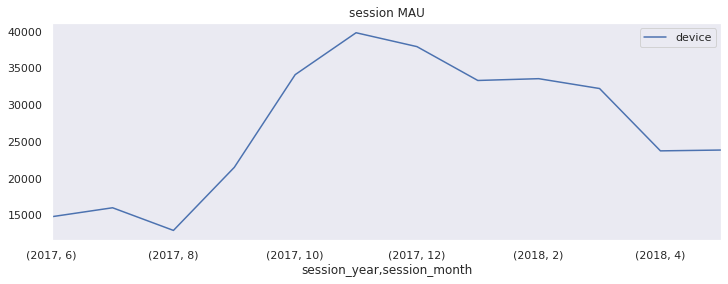

In [6]:
data_visits['week_day'] = data_visits['start_ts'].dt.weekday
data_visits_not_null = data_visits.query('duration > 0')
data_visits_device_month = data_visits_not_null.groupby(['session_year', 'session_month']).agg({'device': 'count'})

data_visits_device_month.plot(figsize=(12,4))
plt.title('session MAU')

Text(0.5, 0, 'Номер дня недели')

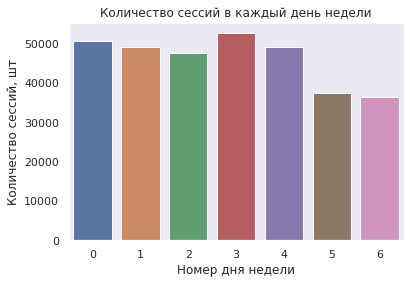

In [7]:
data_visits_device_week = data_visits_not_null.groupby('week_day').agg({'device': 'count'}).reset_index()
gf = sns.barplot(x='week_day', y='device', data=data_visits_device_week)
gf.set_title('Количество сессий в каждый день недели')
gf.set_ylabel('Количество сессий, шт')
gf.set_xlabel('Номер дня недели')

In [53]:
data_visits_device_month

device
session_year session_month        
2017         6               14774
             7               15993
             8               12912
             9               21492
             10              34097
             11              39795
             12              37908
2018         1               33304
             2               33548
             3               32209
             4               23731
             5               23843

Вывод:

- В день - 908 пользователей
- В неделю - 5825 пользователей
- В месяц - 23228 пользователей
- Почти все ежедневные пользователи являются уникальными, так как показатель "session_per_user" - количество пользователей за день равен 1.08
- Показатель "User Retention" находится в диапазоне от 8.5% до 1.9% - что является низким показателем
- После 11 месяца показатель начинает снижаться 
- Продолжительность сессии на основе расчета моды равна 60 секунд
- На графиках "MAU", "session MAU" видно рост количества уникальных визитов и просмотров в период с 8 по 11 месяца, а далее снижение до 5 месяца, на 6 месяце показатели вышли на плато
- В будни сервис пользуется немного большим интересом, чем в выходные. Самый пополярный день - Четверг.

Продажи

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

In [8]:
data_orders['order_month'] = data_orders['buy_ts'].astype('datetime64[M]')
first_data_orders = data_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_data_orders.columns = ['uid', 'first_order_month']
first_data_orders

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [9]:
cohort_sizes = first_data_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [10]:
first_data_orders_main = pd.merge(data_orders,first_data_orders, on='uid')
display(first_data_orders_main)

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [11]:
uid_orders = data_orders['uid'].unique()
buyers_visits = data_visits.query('uid in @uid_orders')
buyers_visits_sort = buyers_visits.sort_values('first_activity_date', ascending=True).reset_index()
buyers_visits_sort = buyers_visits_sort.drop_duplicates(subset='uid')
buyers_visits_sort

,index,device,end_ts,source_id,start_ts,uid,first_activity_date,session_year,session_month,session_week,session_date,duration,first_activity_month,activity_month,cohort_lifetime,week_day
0,11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01 00:09:00,2017,6,22,2017-06-01,120,2017-06-01,2017-06-01,0,3
1,352873,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,16109239769442553005,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140,2017-06-01,2017-06-01,0,3
2,69744,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,11627257723692907447,2017-06-01 00:14:00,2017,6,22,2017-06-01,660,2017-06-01,2017-06-01,0,3
3,190436,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,17903680561304213844,2017-06-01 00:25:00,2017,6,22,2017-06-01,540,2017-06-01,2017-06-01,0,3
4,4106,desktop,2017-08-29 13:50:00,1,2017-08-29 13:41:00,16945437833757229838,2017-06-01 01:18:00,2017,8,35,2017-08-29,540,2017-06-01,2017-08-01,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97389,331681,touch,2018-05-31 23:47:00,4,2018-05-31 23:26:00,15854392578508828030,2018-05-31 23:26:00,2018,5,22,2018-05-31,1260,2018-05-01,2018-05-01,0,3
97390,277991,desktop,2018-05-31 23:40:00,3,2018-05-31 23:31:00,1551265230644458155,2018-05-31 23:31:00,2018,5,22,2018-05-31,540,2018-05-01,2018-05-01,0,3
97391,283943,desktop,2018-05-31 23:44:00,10,2018-05-31 23:35:00,15576344609395725707,2018-05-31 23:35:00,2018,5,22,2018-05-31,540,2018-05-01,2018-05-01,0,3
97392,139217,desktop,2018-05-31 23:55:00,3,2018-05-31 23:52:00,1786462140797698849,2018-05-31 23:52:00,2018,5,22,2018-05-31,180,2018-05-01,2018-05-01,0,3


In [12]:
buyers_visits_orders = first_data_orders_main.merge(buyers_visits_sort, on='uid', how='inner')
buyers_visits_orders

,buy_ts,revenue,uid,order_month,first_order_month,index,device,end_ts,source_id,start_ts,first_activity_date,session_year,session_month,session_week,session_date,duration,first_activity_month,activity_month,cohort_lifetime,week_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01 00:09:00,2017,6,22,2017-06-01,120,2017-06-01,2017-06-01,0,3
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,69744,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017,6,22,2017-06-01,660,2017-06-01,2017-06-01,0,3
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,190436,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01 00:25:00,2017,6,22,2017-06-01,540,2017-06-01,2017-06-01,0,3
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,352873,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140,2017-06-01,2017-06-01,0,3
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,263040,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01 07:31:00,2017,6,22,2017-06-01,1680,2017-06-01,2017-06-01,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,2018-05-31 09:11:00,2018,5,22,2018-05-31,1620,2018-05-01,2018-05-01,0,3
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,129697,desktop,2018-05-31 23:55:00,10,2018-05-31 23:05:00,2018-05-31 23:05:00,2018,5,22,2018-05-31,3000,2018-05-01,2018-05-01,0,3
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,139217,desktop,2018-05-31 23:55:00,3,2018-05-31 23:52:00,2018-05-31 23:52:00,2018,5,22,2018-05-31,180,2018-05-01,2018-05-01,0,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,121449,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,2017-10-23 12:32:00,2018,1,3,2018-01-15,480,2017-10-01,2018-01-01,3,0


In [13]:
display(first_data_orders_main)
data_orders_visits_main = first_data_orders_main.merge(buyers_visits, on='uid', how='inner')
display(data_orders_visits_main)

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


,buy_ts,revenue,uid,order_month,first_order_month,device,end_ts,source_id,start_ts,first_activity_date,session_year,session_month,session_week,session_date,duration,first_activity_month,activity_month,cohort_lifetime,week_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01 00:09:00,2017,6,22,2017-06-01,120,2017-06-01,2017-06-01,0,3
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017,6,22,2017-06-01,660,2017-06-01,2017-06-01,0,3
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01 00:25:00,2017,6,22,2017-06-01,540,2017-06-01,2017-06-01,0,3
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140,2017-06-01,2017-06-01,0,3
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01 07:31:00,2017,6,22,2017-06-01,1680,2017-06-01,2017-06-01,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,2017-10-23 12:32:00,2018,1,3,2018-01-15,480,2017-10-01,2018-01-01,3,0
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,desktop,2017-12-12 16:21:00,5,2017-12-12 16:20:00,2017-10-23 12:32:00,2017,12,50,2017-12-12,60,2017-10-01,2017-12-01,2,1
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,desktop,2017-10-23 12:36:00,3,2017-10-23 12:32:00,2017-10-23 12:32:00,2017,10,43,2017-10-23,240,2017-10-01,2017-10-01,0,0
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,desktop,2017-11-15 17:18:00,4,2017-11-15 17:08:00,2017-10-23 12:32:00,2017,11,46,2017-11-15,600,2017-10-01,2017-11-01,1,2


In [14]:
cohorts_orders = data_orders_visits_main.groupby(['first_order_month','order_month', 'first_activity_month']).agg({'revenue': 'sum'}).reset_index()
final_data_orders_main = pd.merge(cohort_sizes, cohorts_orders, on='first_order_month')
display(cohorts_orders)
display(final_data_orders_main)

,first_order_month,order_month,first_activity_month,revenue
0,2017-06-01,2017-06-01,2017-06-01,148121.29
1,2017-06-01,2017-07-01,2017-06-01,155869.55
2,2017-06-01,2017-08-01,2017-06-01,114898.83
3,2017-06-01,2017-09-01,2017-06-01,374481.76
4,2017-06-01,2017-10-01,2017-06-01,351833.14
...,...,...,...,...
350,2018-05-01,2018-05-01,2018-02-01,1361.90
351,2018-05-01,2018-05-01,2018-03-01,470.99
352,2018-05-01,2018-05-01,2018-04-01,5187.11
353,2018-05-01,2018-05-01,2018-05-01,16045.39


,first_order_month,n_buyers,order_month,first_activity_month,revenue
0,2017-06-01,2023,2017-06-01,2017-06-01,148121.29
1,2017-06-01,2023,2017-07-01,2017-06-01,155869.55
2,2017-06-01,2023,2017-08-01,2017-06-01,114898.83
3,2017-06-01,2023,2017-09-01,2017-06-01,374481.76
4,2017-06-01,2023,2017-10-01,2017-06-01,351833.14
...,...,...,...,...,...
350,2018-05-01,2988,2018-05-01,2018-02-01,1361.90
351,2018-05-01,2988,2018-05-01,2018-03-01,470.99
352,2018-05-01,2988,2018-05-01,2018-04-01,5187.11
353,2018-05-01,2988,2018-05-01,2018-05-01,16045.39


In [16]:
orders_rev = data_orders.merge(first_data_orders, on='uid')
orders_rev

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [17]:
#first_data_orders_main['order_month'] = first_data_orders_main['buy_ts'].astype('datetime64[M]')
cohorts = (first_data_orders_main
                                    .groupby(['order_month', 'first_order_month'])
                                    .agg({'revenue': 'sum'})
                                    .reset_index()
              )
cohorts

,order_month,first_order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-07-01,2017-06-01,981.82
2,2017-07-01,2017-07-01,11557.65
3,2017-08-01,2017-06-01,885.34
4,2017-08-01,2017-07-01,644.61
...,...,...,...
74,2018-05-01,2018-02-01,270.70
75,2018-05-01,2018-03-01,1114.87
76,2018-05-01,2018-04-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [18]:
final_data_orders = cohorts.merge(cohort_sizes, on='first_order_month')
final_data_orders

,order_month,first_order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-07-01,2017-06-01,981.82,2023
2,2017-08-01,2017-06-01,885.34,2023
3,2017-09-01,2017-06-01,1931.30,2023
4,2017-10-01,2017-06-01,2068.58,2023
...,...,...,...,...
74,2018-05-01,2018-03-01,1114.87,3533
75,2018-04-01,2018-04-01,10600.69,2276
76,2018-05-01,2018-04-01,1209.92,2276
77,2018-05-01,2018-05-01,13925.76,2988


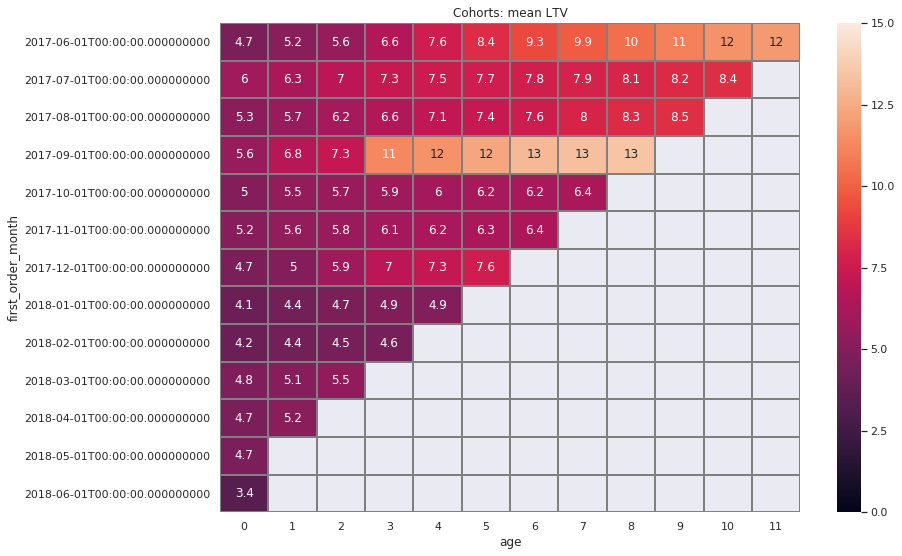

In [19]:
margin_rate = 1 # маржиналоность возьмем на уровне 100%
final_data_orders['gp'] = final_data_orders['revenue'] * margin_rate
final_data_orders['age'] = (final_data_orders['order_month'] - final_data_orders['first_order_month']) / np.timedelta64(1, 'M')
final_data_orders['age'] = final_data_orders['age'].round().astype('int')
final_data_orders['ltv'] = final_data_orders['gp'] / final_data_orders['n_buyers']

result_ltv = final_data_orders.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)

sns.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: mean LTV')
sns.heatmap(result_ltv, annot=True, linewidths=1, linecolor='gray', vmin=0, vmax=15)

In [20]:
final_data_orders_main['time_to_buy'] = (final_data_orders_main['first_order_month'] - final_data_orders_main['first_activity_month'])/ np.timedelta64(1, 'M')
#final_data_orders['time_to_buy'].hist()
moda = st.mode(final_data_orders_main['time_to_buy'])

print('Люди начинают покупать в среднем после',moda,'от первой активности')

Люди начинают покупать в среднем после ModeResult(mode=array([0.]), count=array([78])) от первой активности


Text(0.5, 0, 'Номер месяца')

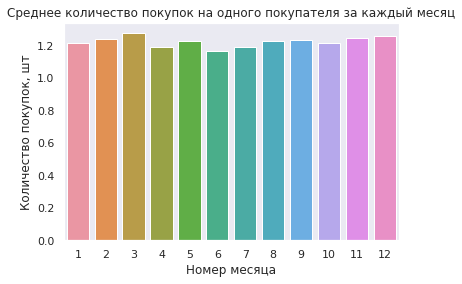

In [21]:
# поправил график
data_orders['order_month']  = data_orders['buy_ts'].dt.month
data_orders['order_week']  = data_orders['buy_ts'].dt.week
data_orders['order_week_day'] = data_orders['buy_ts'].dt.weekday

data_orders_not_null = data_orders.query('revenue > 0')

data_orders_month_count = data_orders_not_null.groupby('order_month').agg({'uid': 'count'}).reset_index()
data_orders_month_count.columns = ['order_month', 'cnt_orders']
data_orders_month_unique = data_orders_not_null.groupby('order_month').agg({'uid': 'nunique'}).reset_index()
data_orders_month_unique.columns = ['order_month', 'cnt_users']
data_orders_month_main = data_orders_month_count.merge(data_orders_month_unique,on='order_month')
data_orders_month_main['orders_per_user'] = data_orders_month_main['cnt_orders']/data_orders_month_main['cnt_users']
   
gf = sns.barplot(x='order_month', y='orders_per_user', data=data_orders_month_main)
gf.set_title('Среднее количество покупок на одного покупателя за каждый месяц')
gf.set_ylabel('Количество покупок, шт')
gf.set_xlabel('Номер месяца')

Text(0.5, 0, 'Номер дня недели')

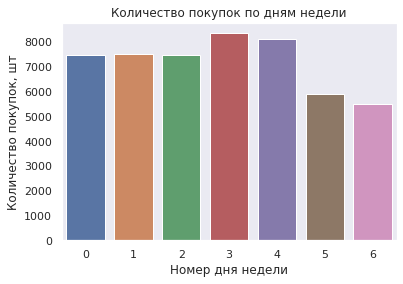

In [22]:
data_orders_weekday = data_orders_not_null.groupby('order_week_day').agg({'uid': 'count'}).reset_index()

gf = sns.barplot(x='order_week_day', y='uid', data=data_orders_weekday)
gf.set_title('Количество покупок по дням недели')
gf.set_ylabel('Количество покупок, шт')
gf.set_xlabel('Номер дня недели')

Вывод

- Люди начинают покупать после 79 дней 1 часа и 28 минут от первого знакомства с сервисом
- Средний чек равен 5
- Cамые высокие LTV у когорты 2017.09.01 и равен 13 за 9 месяцев и когорты 2017.06.01, равен 12 за 12 месяцев
- Количество покупок растет с 9 по 12 месяц, а дальше падает и остается примерно на уровне 5000 покупок в месяц
- Ежемесячно каждый пользователь покупает примерно 1.2 раза. Динамика для всех месяцев одинаковая
- Больше всего покупок приходится на четверг, в выходные покупок делеют реже, чем в будни

Маркетинг

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

In [23]:
print('Всего потратили на маркетинг',data_costs['costs'].sum())
print('')
print('Траты сгруппированные по типу источника:')
source_costs_sum = data_costs.groupby('source_id')['costs'].sum().sort_values(ascending=False).reset_index()
display(source_costs_sum)

data_costs['month'] = data_costs['cost_date'].dt.month
data_costs['year'] = data_costs['cost_date'].dt.year
print('Траты ps 2017 год по месяцам:')
data_costs_2017 = data_costs.query('year == 2017')
display(data_costs_2017.groupby('month')['costs'].sum())

print('Траты ps 2018 год по месяцам:')
data_costs_2018 = data_costs.query('year == 2018')
display(data_costs_2018.groupby('month')['costs'].sum())

Всего потратили на маркетинг 329131.62

Траты сгруппированные по типу источника:


,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


Траты ps 2017 год по месяцам:


month
6     18015.00
7     18240.59
8     14790.54
9     24368.91
10    36322.88
11    37907.88
12    38315.35
Name: costs, dtype: float64

Траты ps 2018 год по месяцам:


month
1    33518.52
2    32723.03
3    30415.27
4    22289.38
5    22224.27
Name: costs, dtype: float64

In [24]:
uid_orders = data_orders['uid'].unique()
buyers_visits = data_visits.query('uid in @uid_orders') # уникальные пользователи, кто был покупателем
buyers_visits_sort = buyers_visits.sort_values('first_activity_date', ascending=True).reset_index() #сортировка по первой активности
buyers_visits_sort = buyers_visits_sort.drop_duplicates(subset='uid') # оставляем только одну(первую) строку визита для вычленения источника прихода 
buyers_visits_sort.head()

,index,device,end_ts,source_id,start_ts,uid,first_activity_date,session_year,session_month,session_week,session_date,duration,first_activity_month,activity_month,cohort_lifetime,week_day
0,11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01 00:09:00,2017,6,22,2017-06-01,120,2017-06-01,2017-06-01,0,3
1,352873,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,16109239769442553005,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140,2017-06-01,2017-06-01,0,3
2,69744,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,11627257723692907447,2017-06-01 00:14:00,2017,6,22,2017-06-01,660,2017-06-01,2017-06-01,0,3
3,190436,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,17903680561304213844,2017-06-01 00:25:00,2017,6,22,2017-06-01,540,2017-06-01,2017-06-01,0,3
4,4106,desktop,2017-08-29 13:50:00,1,2017-08-29 13:41:00,16945437833757229838,2017-06-01 01:18:00,2017,8,35,2017-08-29,540,2017-06-01,2017-08-01,2,1


In [25]:
buyers_visits_orders = first_data_orders_main.merge(buyers_visits_sort, on='uid', how='inner')
buyers_visits_orders

,buy_ts,revenue,uid,order_month,first_order_month,index,device,end_ts,source_id,start_ts,first_activity_date,session_year,session_month,session_week,session_date,duration,first_activity_month,activity_month,cohort_lifetime,week_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01 00:09:00,2017,6,22,2017-06-01,120,2017-06-01,2017-06-01,0,3
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,69744,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017,6,22,2017-06-01,660,2017-06-01,2017-06-01,0,3
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,190436,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01 00:25:00,2017,6,22,2017-06-01,540,2017-06-01,2017-06-01,0,3
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,352873,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140,2017-06-01,2017-06-01,0,3
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,263040,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01 07:31:00,2017,6,22,2017-06-01,1680,2017-06-01,2017-06-01,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,2018-05-31 09:11:00,2018,5,22,2018-05-31,1620,2018-05-01,2018-05-01,0,3
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,129697,desktop,2018-05-31 23:55:00,10,2018-05-31 23:05:00,2018-05-31 23:05:00,2018,5,22,2018-05-31,3000,2018-05-01,2018-05-01,0,3
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,139217,desktop,2018-05-31 23:55:00,3,2018-05-31 23:52:00,2018-05-31 23:52:00,2018,5,22,2018-05-31,180,2018-05-01,2018-05-01,0,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,121449,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,2017-10-23 12:32:00,2018,1,3,2018-01-15,480,2017-10-01,2018-01-01,3,0


In [26]:
buyers_visits_orders_group = buyers_visits_orders.groupby(['source_id', 'first_order_month']).agg({'uid': 'count'}).reset_index()
buyers_visits_orders_group = buyers_visits_orders_group.rename(columns={'uid': 'cnt_users'})
#buyers_visits_orders_group.head()
buyers_visits_orders_group

,source_id,first_order_month,cnt_users
0,1,2017-06-01,668
1,1,2017-07-01,349
2,1,2017-08-01,265
3,1,2017-09-01,501
4,1,2017-10-01,614
...,...,...,...
81,10,2018-01-01,105
82,10,2018-02-01,149
83,10,2018-03-01,198
84,10,2018-04-01,112


In [27]:
data_costs['cost_month'] = data_costs['cost_date'].astype('datetime64[M]')
data_costs_group = data_costs.groupby(['source_id', 'cost_month']).agg({'costs': 'sum'}).reset_index()
orders_costs = pd.merge(buyers_visits_orders_group, data_costs_group, left_on=['first_order_month', 'source_id'], right_on=['cost_month', 'source_id'])
orders_costs['cac'] = orders_costs['costs'] / orders_costs['cnt_users']
orders_costs

,source_id,first_order_month,cnt_users,cost_month,costs,cac
0,1,2017-06-01,668,2017-06-01,1125.61,1.685045
1,1,2017-07-01,349,2017-07-01,1072.88,3.074155
2,1,2017-08-01,265,2017-08-01,951.81,3.591736
3,1,2017-09-01,501,2017-09-01,1502.01,2.998024
4,1,2017-10-01,614,2017-10-01,2315.75,3.771580
...,...,...,...,...,...,...
79,10,2018-01-01,105,2018-01-01,614.35,5.850952
80,10,2018-02-01,149,2018-02-01,480.88,3.227383
81,10,2018-03-01,198,2018-03-01,526.41,2.658636
82,10,2018-04-01,112,2018-04-01,388.25,3.466518


In [28]:
# строим сводную таблицу для наглядности
result_cac = orders_costs.pivot_table(
    index='source_id', 
    columns='cost_month', 
    values='cac')

display(result_cac)
orders_costs_group = orders_costs.groupby('source_id').agg({'cac': 'mean'}).reset_index()
display(orders_costs_group.sort_values('cac', ascending = False))

cost_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1.685045,3.074155,3.591736,2.998024,3.771580,3.230066,2.904715,3.389426,3.972036,3.441982,4.161411,4.342041
2,2.087171,6.044326,3.878051,4.537477,5.170758,5.535527,5.243897,8.332144,8.224890,5.929534,8.909821,4.998959
3,11.172905,10.328896,16.971105,11.558643,11.503830,13.126708,11.908605,15.157400,12.681426,13.915798,16.028983,11.576162
4,3.962570,5.620589,7.086696,6.614344,4.373869,3.447742,4.779384,5.129982,4.795936,5.313610,5.909504,5.261186
5,3.419765,4.906939,5.117752,4.517770,5.191179,7.304088,6.781201,6.790796,6.552080,5.928822,6.519832,6.541105
9,1.793836,2.309466,1.546149,3.056029,2.004638,2.269701,2.911416,3.552987,4.085185,1.960367,6.224833,5.658906
10,3.021346,5.319677,4.560196,5.484167,3.089852,4.716429,6.944731,5.850952,3.227383,2.658636,3.466518,3.058657


,source_id,cac
2,3,12.994205
4,5,5.797611
1,2,5.741046
3,4,5.191284
6,10,4.283212
0,1,3.380185
5,9,3.114460


In [29]:
# Создадим датасет buyers_rev первых покупок и первых сессий
# добавим день и месяц заказа, чтобы посчитать суммарную выручку за эти периоды

data_orders_rev = data_orders[['buy_ts', 'revenue', 'uid']]
data_orders_rev['order_dt'] = data_orders_rev['buy_ts'].dt.date
data_orders_rev['order_month'] = data_orders_rev['buy_ts'].astype('datetime64[M]')
data_orders_rev

,buy_ts,revenue,uid,order_dt,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01


In [30]:
# найдем время первой покупки каждого покупателя

first_orders_rev = data_orders_rev.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders_rev.columns = ['uid', 'first_order_ts']
first_orders_rev['first_order_dt'] = first_orders_rev['first_order_ts'].dt.date
first_orders_rev['first_order_month'] = first_orders_rev['first_order_ts'].astype('datetime64[M]')
first_orders_rev

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-24,2017-11-01
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22,2017-09-01
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-26,2018-03-01
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-18,2018-02-01


In [31]:
# найдем время первого визита каждого пользователя

first_visits_rev = data_visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits_rev.columns = ['uid', 'start_ts']
first_visits_rev.head()

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [32]:
# привязываем к пользователю источник и с какого устройства он заходил

first_visits_rev = first_visits_rev.merge(data_visits[['uid', 'device', 'source_id', 'start_ts']], 
                                  on = ['uid', 'start_ts'])
first_visits_rev.head()

,uid,start_ts,device,source_id
0,11863502262781,2018-03-01 17:27:00,touch,3
1,49537067089222,2018-02-06 15:55:00,touch,2
2,297729379853735,2017-06-07 18:47:00,desktop,3
3,313578113262317,2017-09-18 22:49:00,desktop,2
4,325320750514679,2017-09-30 14:29:00,desktop,5


In [33]:
# колонки даты и месяца первой сессии

first_visits_rev['first_session_dt'] = first_visits_rev['start_ts'].dt.date
first_visits_rev['first_session_month'] = first_visits_rev['start_ts'].astype('datetime64[M]')
first_visits_rev

,uid,start_ts,device,source_id,first_session_dt,first_session_month
0,11863502262781,2018-03-01 17:27:00,touch,3,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,touch,2,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,desktop,3,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,desktop,2,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,desktop,5,2017-09-30,2017-09-01
...,...,...,...,...,...,...
228165,18446403737806311543,2017-11-30 03:36:00,desktop,5,2017-11-30,2017-11-01
228166,18446424184725333426,2017-12-06 20:32:00,touch,4,2017-12-06,2017-12-01
228167,18446556406699109058,2018-01-01 16:29:00,touch,3,2018-01-01,2018-01-01
228168,18446621818809592527,2017-12-27 13:27:00,desktop,4,2017-12-27,2017-12-01


In [34]:
# объединяем данные о первых покупках с данными о первых сессиях
buyers_rev = pd.merge(first_visits_rev, first_orders_rev, on='uid')
buyers_rev.head()

,uid,start_ts,device,source_id,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,desktop,2,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,touch,10,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,desktop,3,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,desktop,5,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,desktop,5,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [35]:
# группируем по источнику и дате первой покупке (по дням, а не по месяцам, т.к. в costs у нас данные по дням)

buyers_month_rev = buyers_rev.groupby(['source_id', 'first_order_month']).agg({'uid': 'count'}).reset_index()
buyers_daily_rev = buyers_rev.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily_rev.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily_rev['first_order_dt'] = pd.to_datetime(buyers_daily_rev['first_order_dt'])
display(buyers_month_rev)
# но для примера выведу тебе по месяцам

,source_id,first_order_month,uid
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
81,10,2018-01-01,92
82,10,2018-02-01,123
83,10,2018-03-01,186
84,10,2018-04-01,107


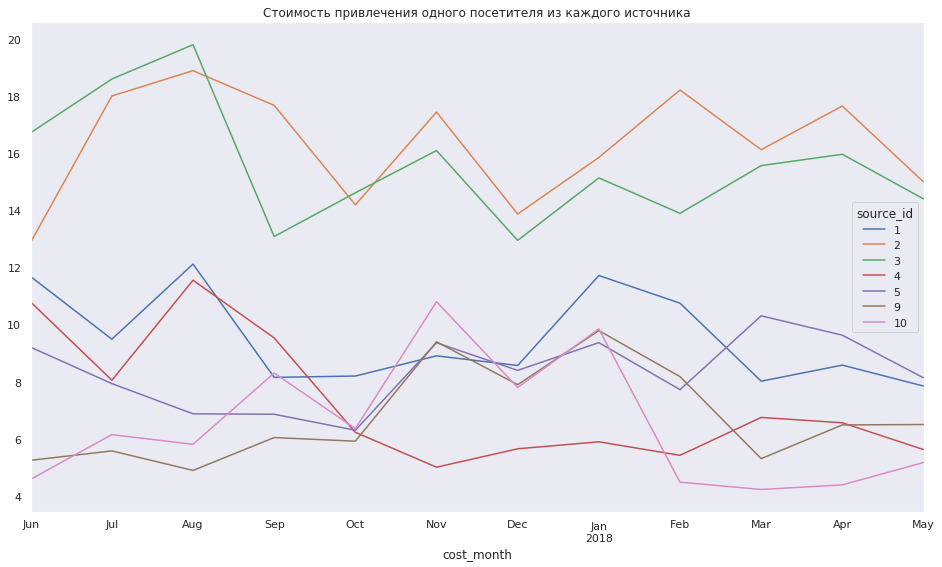

In [36]:
# добавляем затраты и рассчитываем cac
costs_rev = pd.merge(buyers_daily_rev, data_costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'cost_date'])
costs_rev['costs_per_buyer'] = costs_rev['costs']/costs_rev['n_buyers']

#строим график
costs_rev.pivot_table(index=['cost_month'], columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(figsize=(16,9), title='Стоимость привлечения одного посетителя из каждого источника')
plt.show()

In [37]:
costs_per_buyer = costs_rev.groupby('source_id')[['costs_per_buyer']].describe()

costs_per_buyer['costs_per_buyer']['mean']

source_id
1      9.489732
2     16.287024
3     15.580474
4      7.271743
5      8.336731
9      6.842532
10     6.555415
Name: mean, dtype: float64

In [38]:
costs_rev

,source_id,first_order_dt,n_buyers,cost_date,costs,month,year,cost_month,costs_per_buyer
0,1,2017-06-01,14,2017-06-01,75.20,6,2017,2017-06-01,5.371429
1,1,2017-06-02,7,2017-06-02,62.25,6,2017,2017-06-01,8.892857
2,1,2017-06-03,7,2017-06-03,36.53,6,2017,2017-06-01,5.218571
3,1,2017-06-04,3,2017-06-04,55.00,6,2017,2017-06-01,18.333333
4,1,2017-06-05,18,2017-06-05,57.08,6,2017,2017-06-01,3.171111
...,...,...,...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,5,2018,2018-05-01,4.960000
2429,10,2018-05-28,10,2018-05-28,21.26,5,2018,2018-05-01,2.126000
2430,10,2018-05-29,7,2018-05-29,11.32,5,2018,2018-05-01,1.617143
2431,10,2018-05-30,5,2018-05-30,33.15,5,2018,2018-05-01,6.630000


In [39]:
total_revenue = data_orders['revenue'].sum() 
total_costs = data_costs['costs'].sum()
roi_total = (total_revenue-total_costs)/total_costs
print('Общий ROI сервиса равен',round(roi_total, 2)*100,'%')
print('')

Общий ROI сервиса равен -23.0 %



In [40]:
source_ltv = buyers_visits_orders.groupby('source_id').agg({'revenue': 'sum'}).reset_index()
source_ltv    

,source_id,revenue
0,1,38377.04
1,2,55836.58
2,3,44521.32
3,4,51881.74
4,5,50459.07
5,7,1.22
6,9,6855.95
7,10,4124.28


In [41]:
source_ltv_uid = buyers_visits_orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
source_ltv_uid

,source_id,uid
0,1,3818
1,2,4251
2,3,9154
3,4,9831
4,5,6786
5,7,1
6,9,1443
7,10,1239


In [42]:
source_ltv_main = source_ltv_uid.merge(source_ltv, on='source_id')
source_ltv_main['ltv'] = source_ltv_main['revenue']/source_ltv_main['uid']
source_ltv_main

,source_id,uid,revenue,ltv
0,1,3818,38377.04,10.051608
1,2,4251,55836.58,13.134928
2,3,9154,44521.32,4.863592
3,4,9831,51881.74,5.277361
4,5,6786,50459.07,7.435760
5,7,1,1.22,1.220000
6,9,1443,6855.95,4.751178
7,10,1239,4124.28,3.328717


In [43]:
orders_costs_cac_mean = costs_rev.groupby('source_id').agg({'costs_per_buyer': 'mean'}).reset_index()
#display(orders_costs_cac_mean)
source_romi = source_ltv_main.merge(orders_costs_cac_mean, on='source_id')
source_romi['romi'] = source_romi['ltv']/source_romi['costs_per_buyer']
display(source_romi)

,source_id,uid,revenue,ltv,costs_per_buyer,romi
0,1,3818,38377.04,10.051608,9.489732,1.059209
1,2,4251,55836.58,13.134928,16.287024,0.806466
2,3,9154,44521.32,4.863592,15.580474,0.312159
3,4,9831,51881.74,5.277361,7.271743,0.725735
4,5,6786,50459.07,7.435760,8.336731,0.891928
5,9,1443,6855.95,4.751178,6.842532,0.694360
6,10,1239,4124.28,3.328717,6.555415,0.507781


Text(0.5, 0, 'Номер месяца')

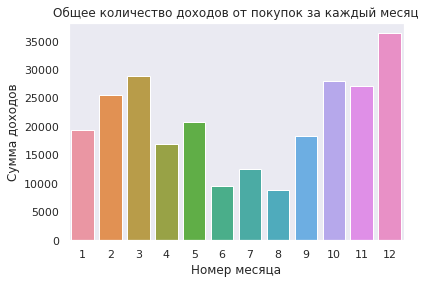

In [44]:
data_orders_month = data_orders.groupby('order_month').agg({'revenue': 'sum'}).reset_index()
data_orders_month.rename(columns={'order_month': 'month'}, inplace=True)

gf = sns.barplot(x='month', y='revenue', data=data_orders_month)
gf.set_title('Общее количество доходов от покупок за каждый месяц')
gf.set_ylabel('Сумма доходов')
gf.set_xlabel('Номер месяца')

Text(0.5, 0, 'Номер месяца')

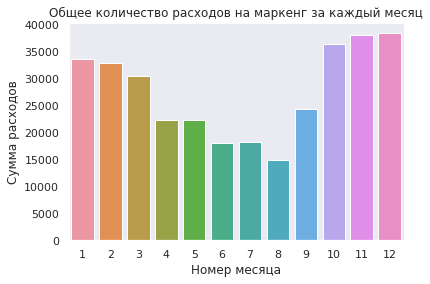

In [45]:
data_costs_month = data_costs.groupby('month').agg({'costs': 'sum'}).reset_index()

gf = sns.barplot(x='month', y='costs', data=data_costs_month)
gf.set_title('Общее количество расходов на маркенг за каждый месяц')
gf.set_ylabel('Сумма расходов')
gf.set_xlabel('Номер месяца')

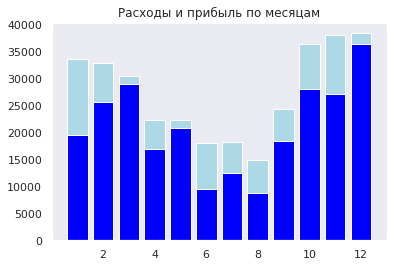

In [46]:
data_bar_main = data_costs_month.merge(data_orders_month, on='month')
fig, ax = plt.subplots()
ax.set_title('Расходы и прибыль по месяцам')
ax.bar(data_bar_main['month'], data_bar_main['costs'],color = 'lightblue')
ax.bar(data_bar_main['month'], data_bar_main['revenue'],color = 'blue')
plt.show()

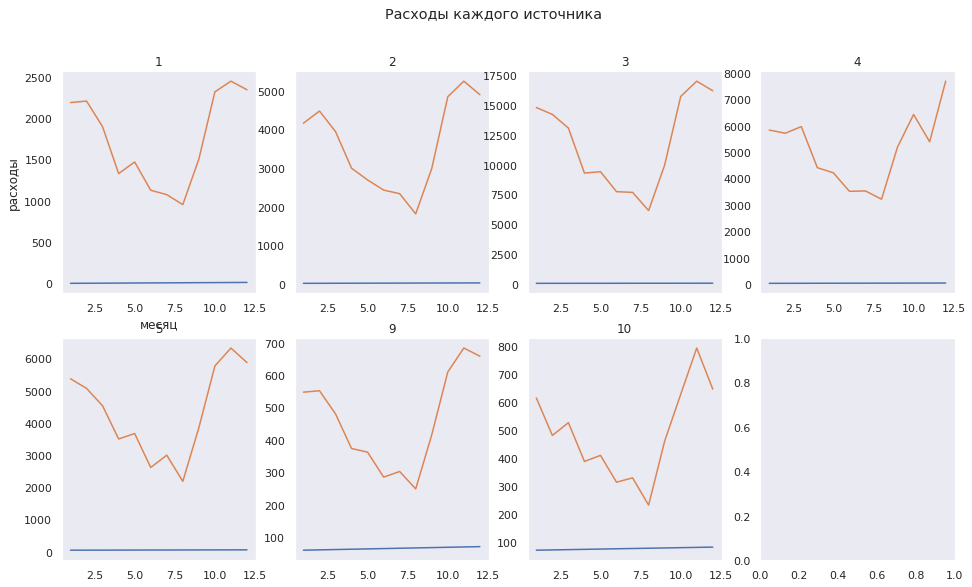

In [47]:
data_costs_month_source = data_costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()
sources = data_costs_month_source['source_id'].unique()
x = pd.Series(data_costs_month_source['month'].unique())
fig, axs = plt.subplots(2, 4, figsize=(16,9))
plt.suptitle("Расходы каждого источника")
axs[0 // 4, 0 % 4].set_xlabel('месяц')
axs[0 // 4, 0 % 4].set_ylabel('расходы')

for i in range(len(sources)):
    y = pd.Series(data_costs_month_source[data_costs_month_source['source_id'] == sources[i]]['costs']).reset_index()
    axs[i // 4, i % 4].plot(x, y)
    axs[i // 4, i % 4].set_title('{}'.format(sources[i]))

Text(0.5, 0, 'Номер месяца')

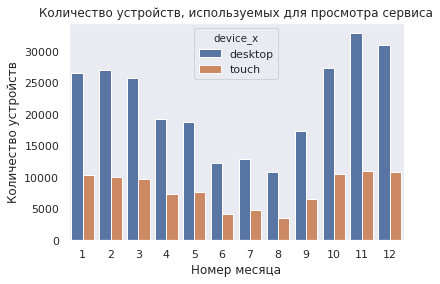

In [48]:
data_visits_platform = data_visits.groupby(['device', 'session_month']).agg({'uid': 'count'}).reset_index()
data_visits_platform.rename(columns={'session_month': 'month', 'uid': 'visits'}, inplace=True)

visits_orders_platform = buyers_visits_orders.groupby(['device', 'session_month']).agg({'uid': 'count'}).reset_index()
visits_orders_platform.rename(columns={'session_month': 'month', 'uid': 'buyers'}, inplace=True)

platform_main = data_visits_platform.merge(visits_orders_platform, on='month')

gf =sns.barplot(x = 'month', y = 'visits', hue = 'device_x', data = platform_main)
gf.set_title('Количество устройств, используемых для просмотра сервиса')
gf.set_ylabel('Количество устройств')
gf.set_xlabel('Номер месяца')

Text(0.5, 0, 'Номер месяца')

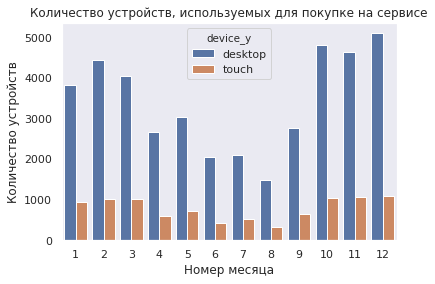

In [49]:
gf = sns.barplot(x = 'month', y = 'buyers', hue = 'device_y', data = platform_main)

gf.set_title('Количество устройств, используемых для покупке на сервисе')
gf.set_ylabel('Количество устройств')
gf.set_xlabel('Номер месяца')

### Шаг 3. Вывод

Использование сервиса:

- В день - 908 пользователей
- В неделю - 5825 пользователей
- В месяц - 23228 пользователей
- Почти все ежедневные пользователи являются уникальными, так как показатель "session_per_user" - количество пользователей за день равен 1.08
- Показатель "User Retention" находится в диапазоне от 8.5% до 1.9% - что является низким показателем
- После 11 месяца показатель начинает снижаться 
- Продолжительность сессии на основе расчета равна 60 секунд
- На графиках "MAU", "session MAU" видно рост количества уникальных визитов и просмотров в период с 8 по 11 месяца, а далее снижение до 5 месяца, на 6 месяце показатели вышли на плато
- В будни сервис пользуется немного большим интересом, чем в выходные. Самый пополярный день - Четверг.
	
Продажи:

- Люди начинают покупать в месяце знакомства с сервисом
- Средний чек равен 5
- Cамые высокие LTV у когорты 2017.09.01 и равен 13 за 9 месяцев и когорты 2017.06.01, равен 12 за 12 месяцев
- Количество покупок растет с 9 по 12 месяц, а дальше падает и остается примерно на уровне 5000 покупок в месяц
- Ежемесячно каждый пользователь покупает примерно 1.2 раза. Динамика для всех месяцев одинаковая
- Больше всего покупок приходится на четверг, в выходные покупок делеют реже, чем в будни
	
	
Маркетинг:

- Всего на маркетинг потратили 329131.62
- Больше всего трат на маркетинг было в 12 месяце - 38315.35
- Меньше всего трат на маркетинг было в 8 месяце - 14790.54
- Самым дорогим источником рекламы является 2 - затраты 16.28 на привлечение одного пользователя
- Самым дешевым источником рекламы является 10 - затраты 6.55 на привлечение одного пользователя
- ROI у сервиса является отрицательным и равен - 23%
- Самая быстрая окупаемость у источника 1, его ROMI равен 1.05
- Самая низкая окупаемость у источника 3, его ROMI равен 0.31

	
	
Общий вывод:	

- Каждый иследуемый месяц был убыточным для сервиса в 3 и 12 месяцах потчи получилось окупить затраты на рекламу
- Из общей гистограммы доходов и расхоодов видим, что доходы сервиса прямо-пропорциональны затратам на рекламу
- Из гистограммы устройств видно что Desctop устройства сильно лидирует по сравнению с Touch устройствами, как в визитах, так и в продажах. В продажах лидерство намного ощутимее.
- Для того, чтобы вывести сервис в безубыточность, а далее прибыль требуется:
		увеличить значение показателя "User Retention"
		оптимизировать затраты по рекламным источникам
			отказаться от 3го источника рекламы
			масштабировать 1ый источник рекламы
			запустить или полность отказаться от 6, 7 и 8 источников, так как по ним нет никаких действий
			улучшить окупаемость 2го и 5го источников, так как у них самая высокая окупаемость по сравнению с остальными 